# Dementia Project

Linear Regression
Logistic Regression
SVM
Neural Networks

In [114]:
# Run this code cell using Shift + Enter before moving further
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model, preprocessing
    
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_fscore_support

from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline 

# Loading the data set.

In [115]:
# After completing the code in this code cell, run this code cell before moving further.

df = pd.read_csv('oasis_cross-sectional.csv', na_values='?') 
print(df.shape)
print(df)

(436, 12)
                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3

In [116]:
# ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF

df1= df[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF', 'CDR']]
print(df1)

df2= df1.dropna()
print(df2)

    M/F  Age  eTIV   nWBV    ASF  CDR
0     F   74  1344  0.743  1.306  0.0
1     F   55  1147  0.810  1.531  0.0
2     F   73  1454  0.708  1.207  0.5
3     M   28  1588  0.803  1.105  NaN
4     M   18  1737  0.848  1.010  NaN
..   ..  ...   ...    ...    ...  ...
431   M   20  1469  0.847  1.195  NaN
432   M   22  1684  0.790  1.042  NaN
433   M   22  1580  0.856  1.111  NaN
434   F   20  1262  0.861  1.390  NaN
435   F   26  1283  0.834  1.368  NaN

[436 rows x 6 columns]
    M/F  Age  eTIV   nWBV    ASF  CDR
0     F   74  1344  0.743  1.306  0.0
1     F   55  1147  0.810  1.531  0.0
2     F   73  1454  0.708  1.207  0.5
8     M   74  1636  0.689  1.073  0.0
9     F   52  1321  0.827  1.329  0.0
..   ..  ...   ...    ...    ...  ...
411   F   70  1295  0.748  1.355  0.5
412   F   73  1536  0.730  1.142  0.5
413   F   61  1354  0.825  1.297  0.0
414   M   61  1637  0.780  1.072  0.0
415   F   62  1372  0.766  1.279  0.0

[235 rows x 6 columns]


In [117]:
x = np.array(df2[['M/F', 'Age', 'eTIV', 'nWBV', 'ASF']])
y = np.array(df2['CDR'])

y = y.reshape(-1,1)

for entry in x:
    if entry[0] == 'F':
        entry[0] = 0
    else:
        entry[0] = 1

for entry in y:
    if entry[0] != 0:
        entry[0] = 1
        
print(type(y[0][0]))

print(x.shape)
print(y.shape)

<class 'numpy.float64'>
(235, 5)
(235, 1)


In [118]:
# Converting our y values into ints

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

print(y[0])

0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
#Scaling & Splitting Data

x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.275)

print(x)
print(x_train.shape)
print(y_test.shape)

[[-0.71162508  0.1371931  -0.72174218 -0.12827252  0.6929025 ]
 [-0.71162508 -1.43752977 -1.95278831  1.27328952  2.43504324]
 [-0.71162508  0.05431295 -0.03435601 -0.8604318  -0.07363942]
 ...
 [-0.71162508 -0.94024886 -0.65925253  1.58707206  0.62321687]
 [ 1.40523434 -0.94024886  1.10920461  0.64572442 -1.11892387]
 [-0.71162508 -0.85736871 -0.54677115  0.35286071  0.48384561]]
(170, 5)
(65,)


In [121]:
# Linear Regression (SIMPLE)

reg = LinearRegression().fit(x_train, y_train)
rsq = reg.score(x_train, y_train)
coef = reg.coef_
intercept = reg.intercept_

print(rsq)

0.24447591541694494


In [48]:
yhat = reg.predict(x_test)
#print(yhat)

#CONTINUE...

In [ ]:
# Logistic Regression and SVMs

In [134]:
def logreg_model_lasso(c , X_train, Y_train, X_test, Y_test):
    logreg_lasso = linear_model.LogisticRegression(C=c, penalty='l1', solver='saga')
    logreg_lasso.fit(X_train, Y_train)    
    
    Yhat_train = logreg_lasso.predict(X_train)
    
    acc_train = logreg_lasso.score(X_train, Y_train)
    acc_train_logreg_lasso.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg_lasso.predict(X_test)
    
    acc_test = logreg_lasso.score(X_test, Y_test)
    acc_test_logreg_lasso.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg_lasso.append(c)

In [123]:
def logreg_model_ridge(c , X_train, Y_train, X_test, Y_test):
    logreg_ridge = linear_model.LogisticRegression(C=c, solver='lbfgs')
    logreg_ridge.fit(X_train, Y_train)
    
    Yhat_train = logreg_ridge.predict(X_train)
    
    acc_train = logreg_ridge.score(X_train, Y_train)
    acc_train_logreg_ridge.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg_ridge.predict(X_test)
    
    acc_test = logreg_ridge.score(X_test, Y_test)
    acc_test_logreg_ridge.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg_ridge.append(c)

In [124]:
def svm_linear(c, X_train, Y_train, X_test, Y_test):
    svc_linear = svm.SVC(C=c, kernel='linear')
    svc_linear.fit(X_train, Y_train)
    
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    
    acc_train = svc_linear.score(X_train, Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)

    acc_test = svc_linear.score(X_test, Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)

In [125]:
def svm_rbf(c, X_train, Y_train, X_test, Y_test):
    svc_rbf = svm.SVC(C=c, kernel='rbf', gamma='scale')
    svc_rbf.fit(X_train, Y_train)
    
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)

    acc_train = svc_rbf.score(X_train, Y_train)
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    
    acc_test = svc_rbf.score(X_test, Y_test)
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_rbf.append(c)

In [126]:
def svm_polynomial(c, X_train, Y_train, X_test, Y_test):
    svc_polynomial = svm.SVC(C=c, kernel='poly', gamma='scale')
    
    A = X_train #[0:300,:]  # First 300 rows of training set.
    B = Y_train #[0:300]  
    C = X_test #[0:100,:]   # First 100 rows of test set.
    D = Y_test #[0:100]
    
    svc_polynomial.fit(A, B)
    
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    
    acc_train = svc_polynomial.score(A, B)
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_polynomial.predict(C)

    acc_test = svc_polynomial.score(C, D)
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)    

In [ ]:
# Running the models on the datasets

In [140]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [141]:
acc_train_logreg_lasso = []
acc_test_logreg_lasso = []
c_logreg_lasso = []

for c in cVals:
    logreg_model_lasso(c, x_train, y_train, x_test, y_test)

Accuracy on training data = 0.582353
Accuracy on test data = 0.553846
Accuracy on training data = 0.582353
Accuracy on test data = 0.553846
Accuracy on training data = 0.582353
Accuracy on test data = 0.553846
Accuracy on training data = 0.688235
Accuracy on test data = 0.723077
Accuracy on training data = 0.705882
Accuracy on test data = 0.707692
Accuracy on training data = 0.705882
Accuracy on test data = 0.692308
Accuracy on training data = 0.700000
Accuracy on test data = 0.707692


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


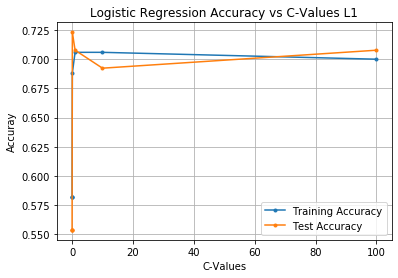

In [142]:
plt.plot(c_logreg_lasso, acc_train_logreg_lasso, '.-')
plt.plot(c_logreg_lasso, acc_test_logreg_lasso, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("Logistic Regression Accuracy vs C-Values L1")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [143]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

for c in cVals:
    logreg_model_ridge(c, x_train, y_train, x_test, y_test)

Accuracy on training data = 0.582353
Accuracy on test data = 0.553846
Accuracy on training data = 0.582353
Accuracy on test data = 0.553846
Accuracy on training data = 0.641176
Accuracy on test data = 0.646154
Accuracy on training data = 0.700000
Accuracy on test data = 0.723077
Accuracy on training data = 0.711765
Accuracy on test data = 0.707692
Accuracy on training data = 0.700000
Accuracy on test data = 0.692308
Accuracy on training data = 0.700000
Accuracy on test data = 0.707692


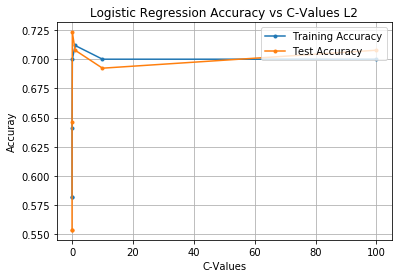

In [144]:
plt.plot(c_logreg_ridge, acc_train_logreg_ridge, '.-')
plt.plot(c_logreg_ridge, acc_test_logreg_ridge, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("Logistic Regression Accuracy vs C-Values L2")
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [146]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

for c in cVals:
    svm_linear(c, x_train, y_train, x_test, y_test)

Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.676471
Test Accuracy = 0.661538
Train Accuracy = 0.723529
Test Accuracy = 0.692308
Train Accuracy = 0.711765
Test Accuracy = 0.692308
Train Accuracy = 0.717647
Test Accuracy = 0.692308
Train Accuracy = 0.705882
Test Accuracy = 0.692308


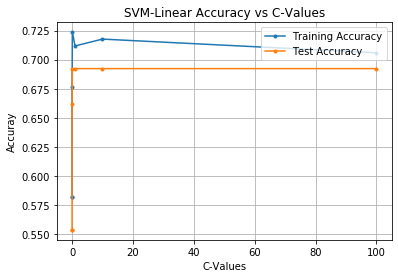

In [147]:
plt.plot(c_svm_linear, acc_train_svm_linear, '.-')
plt.plot(c_svm_linear, acc_test_svm_linear, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("SVM-Linear Accuracy vs C-Values")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [149]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

for c in cVals:
    svm_rbf(c, x_train, y_train, x_test, y_test)

Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.635294
Test Accuracy = 0.584615
Train Accuracy = 0.752941
Test Accuracy = 0.769231
Train Accuracy = 0.794118
Test Accuracy = 0.738462
Train Accuracy = 0.811765
Test Accuracy = 0.692308


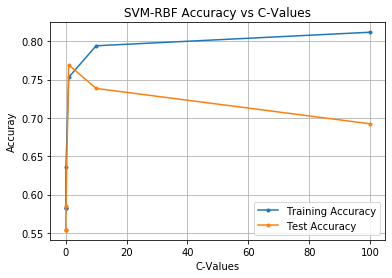

In [150]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, '.-')
plt.plot(c_svm_rbf, acc_test_svm_rbf, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("SVM-RBF Accuracy vs C-Values")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [151]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

for c in cVals:
    svm_polynomial(c, x_train, y_train, x_test, y_test)

Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.582353
Test Accuracy = 0.553846
Train Accuracy = 0.600000
Test Accuracy = 0.569231
Train Accuracy = 0.611765
Test Accuracy = 0.569231
Train Accuracy = 0.670588
Test Accuracy = 0.692308
Train Accuracy = 0.723529
Test Accuracy = 0.753846
Train Accuracy = 0.735294
Test Accuracy = 0.769231


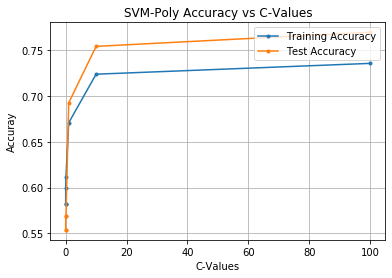

In [152]:
plt.plot(c_svm_poly, acc_train_svm_poly, '.-')
plt.plot(c_svm_poly, acc_test_svm_poly, '.-')
plt.xlabel('C-Values')
plt.ylabel('Accuray')
plt.title("SVM-Poly Accuracy vs C-Values")
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [155]:
# Neural Networks

In [156]:
# Unsupervised Learning